In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
#load the dataset
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print("dimension of diabetes data: {}".format(dataset.shape))

dimension of diabetes data: (768, 9)


In [8]:
#Outcome” is the feature we are going to predict, 
#0 means No diabetes, 1 means diabetes
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


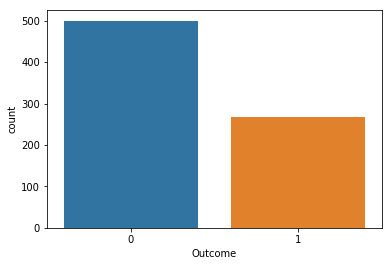

In [9]:
import seaborn as sns
sns.countplot(dataset['Outcome'],label="Count") 


In [6]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = dataset[feature_cols] # Features
Y = dataset.Outcome # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


# Decision Tree Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.684


### Need to apply pre-pruning to the tree.Set max_depth=3, limiting the depth of the tree decreases overfitting

In [9]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))
prediction_tree = tree.predict(X_test)

Accuracy on training set: 0.764
Accuracy on test set: 0.758


#### Confusion matrix by Decision Tree

In [10]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, prediction_tree)
confusion_matrix

array([[127,  19],
       [ 37,  48]], dtype=int64)

<Figure size 432x288 with 0 Axes>

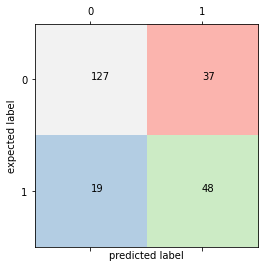

In [11]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')
for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])       
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## Random Forest Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.784


#### adjust the max_features setting, to see  the result can be improved

In [13]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))
prediction_rf = rf.predict(X_test)

Accuracy on training set: 0.790
Accuracy on test set: 0.775


In [14]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, prediction_rf)
confusion_matrix

array([[132,  14],
       [ 36,  49]], dtype=int64)

<Figure size 432x288 with 0 Axes>

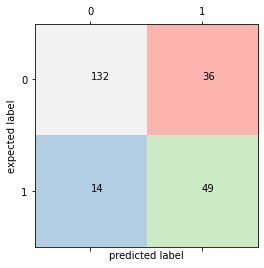

In [15]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## Gradient Boosting Classification

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, Y_test)))

Accuracy on training set: 0.935
Accuracy on test set: 0.797


In [17]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
gb1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, Y_test)))
prediction = gb1.predict(X_test)

Accuracy on training set: 0.845
Accuracy on test set: 0.792


In [18]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
confusion_matrix

array([[130,  16],
       [ 32,  53]], dtype=int64)

<Figure size 432x288 with 0 Axes>

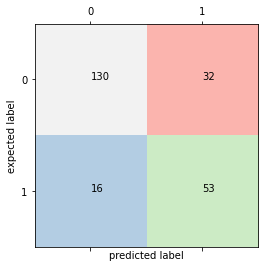

In [19]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [32]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [
               DecisionTreeClassifier(random_state=0),
               RandomForestClassifier(random_state=0,max_depth=3),
               GradientBoostingClassifier(random_state=0, max_depth=2)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

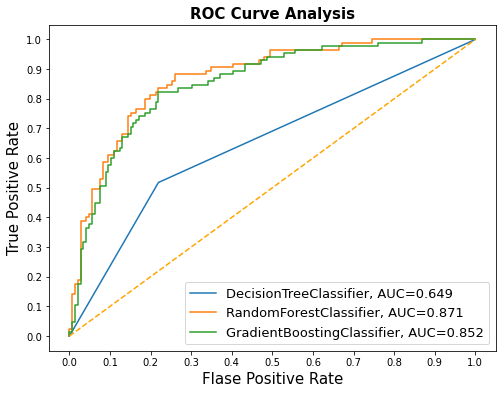

In [33]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [22]:
fig.savefig('multiple_roc_curve.png')

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_test, prediction)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test,prediction)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediction)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediction)
print('F1 score: %f' % f1)
kappa = cohen_kappa_score(Y_test, prediction)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yproba)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, prediction)
print(matrix)

Accuracy: 0.792208
Precision: 0.768116
Recall: 0.623529
F1 score: 0.688312
Cohens kappa: 0.534977
ROC AUC: 0.851974
[[130  16]
 [ 32  53]]


In [41]:
#decision tree
accuracy = accuracy_score(Y_test, prediction_tree)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test,prediction_tree)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediction_tree)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediction_tree)
print('F1 score: %f' % f1)
kappa = cohen_kappa_score(Y_test, prediction_tree)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yproba)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, prediction_tree)
print(matrix)

Accuracy: 0.757576
Precision: 0.716418
Recall: 0.564706
F1 score: 0.631579
Cohens kappa: 0.454683
ROC AUC: 0.851974
[[127  19]
 [ 37  48]]


In [42]:
#random forest
accuracy = accuracy_score(Y_test, prediction_rf)
print('Accuracy of random forest: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test,prediction_rf)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, prediction_rf)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, prediction_tree)
print('F1 score: %f' % f1)
kappa = cohen_kappa_score(Y_test, prediction_rf)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yproba)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, prediction_rf)
print(matrix)

Accuracy of random forest: 0.783550
Precision: 0.777778
Recall: 0.576471
F1 score: 0.631579
Cohens kappa: 0.508050
ROC AUC: 0.851974
[[132  14]
 [ 36  49]]
